<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Rick_RiveU9Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Unit 9 Project: “Can a neural network accurately predict whether a person earns more than $50,000 per year based on education and other factors?”**

**Context:**

I recently turned 18, and like many people my age, I’ve started thinking seriously about my future—especially when it comes to education, career, and financial independence. To explore this, I decided to analyze real-world data from the *Federal Reserve’s Survey of Consumer Finances (SCF)* to examine how a person’s level of education might affect their earnings. However not only that, I want to combine some other variables such as wage income, age, and networth to see how income is being affected. With student debt rising and college degrees no longer guaranteeing high-paying jobs, this project is a way for me to better understand the connection between education, money-treated variables, and income — not just as a research topic, but as something that directly impacts my own life and future choices.




**About the Dataset:**

Here's some of the column names I will be using in this project, and their respective values/meanings.

*   WAGEINC -	Wage and salary income (before taxes). This includes earnings from jobs.
*   AGE	- Age of the household head.
* EDUC - Education level (coded numerically).
* NETWORTH -	Net worth (total assets minus total liabilities) of the household.
* INCOME -	Total household income from all sources: wages, business, investments, etc.

[Link to Dataset](https://www.federalreserve.gov/econres/scfindex.htm)

# **Dataset Visualization:**

In [ ]:
income_data = pd.read_csv('https://raw.githubusercontent.com/LiterallyRicky/DataScience-A2/refs/heads/main/Data/SCFP2022.csv')
income_data

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [ ]:
income_data['EDUC'].value_counts()

,count
EDUC,
12,5908
8,4522
13,3322
9,2842
14,2138
10,1152
11,945
7,471
6,395


Little disclaimer: this is how the education level is descripted for this dataset. At least, I think it is.

| Code | Education Level Description                          | Count |
| ---- | ---------------------------------------------------- | ---------- |
| 1    | 1st–4th grade                                        | 133        |
| 2    | 5th–6th grade                                        | 265        |
| 3    | 7th–8th grade                                        | 231        |
| 4    | 9th grade                                            | 306        |
| 5    | 10th grade                                           | 285        |
| 6    | 11th grade                                           | 395        |
| 7    | 12th grade (no diploma)                              | 471        |
| 8    | High school diploma or equivalent (GED)              | 4522       |
| 9    | Some college, no degree                              | 2842       |
| 10   | Associate's degree, occupational                     | 1152       |
| 11   | Associate's degree, academic                         | 945        |
| 12   | Bachelor's degree                                    | 5908       |
| 13   | Master's degree (e.g., MA, MS)                       | 3322       |
| 14   | Doctorate or professional degree (e.g., PhD, JD, MD) | 2138       |
| -1   | Refused or missing                                   | 60         |


Here are the variables going to be used for this project:

In [ ]:
# Randomly sample 5,000 rows from your data
sampled_data = income_data.sample(n=5000, random_state=42)  # Set random_state for reproducibility
income_data = sampled_data
# Peek at a few common financial variables
income_variables = sampled_data[['WAGEINC', 'AGE', 'EDUC', 'NETWORTH', 'INCOME']]
income_variables

,WAGEINC,AGE,EDUC,NETWORTH,INCOME
20558,1.297094e+04,38,2,17100.0,1.621368e+04
5352,8.106839e+06,56,13,40704500.0,9.090468e+06
10347,1.070103e+04,80,12,296670.0,6.485471e+04
14726,1.729459e+04,74,7,122770.0,4.431738e+04
4115,2.594188e+04,66,9,78620.0,4.107465e+04
...,...,...,...,...,...
2495,0.000000e+00,31,5,0.0,6.485471e+03
13082,1.437613e+05,28,12,306600.0,1.740268e+05
746,2.810371e+04,46,11,9760.0,2.810371e+04
21473,0.000000e+00,81,12,10294200.0,8.863477e+04


The following is not my model, but rather Gemini's model where I created a prompt and would produce their own neural network. Of course, this is just an experiment to see what what happened *and I'm writing this after I had made my two models. As well, this is a way to see if I maybe screwed up any code along the way. However, I think the data is somewhat the same. The predicted is not too great at predicting the test data.

Epoch [10/200], Loss: 100270415544320.0000
Epoch [20/200], Loss: 103373688799232.0000
Epoch [30/200], Loss: 100497646157824.0000
Epoch [40/200], Loss: 91053986152448.0000
Epoch [50/200], Loss: 91990020587520.0000
Epoch [60/200], Loss: 91427396648960.0000
Epoch [70/200], Loss: 90989343539200.0000
Epoch [80/200], Loss: 90981374361600.0000
Epoch [90/200], Loss: 90969227657216.0000
Epoch [100/200], Loss: 90939716534272.0000
Epoch [110/200], Loss: 90915532177408.0000
Epoch [120/200], Loss: 90893101039616.0000
Epoch [130/200], Loss: 90876248326144.0000
Epoch [140/200], Loss: 90858690969600.0000
Epoch [150/200], Loss: 90841427214336.0000
Epoch [160/200], Loss: 90823014219776.0000
Epoch [170/200], Loss: 90804425064448.0000
Epoch [180/200], Loss: 90784284016640.0000
Epoch [190/200], Loss: 90764033916928.0000
Epoch [200/200], Loss: 90745218269184.0000


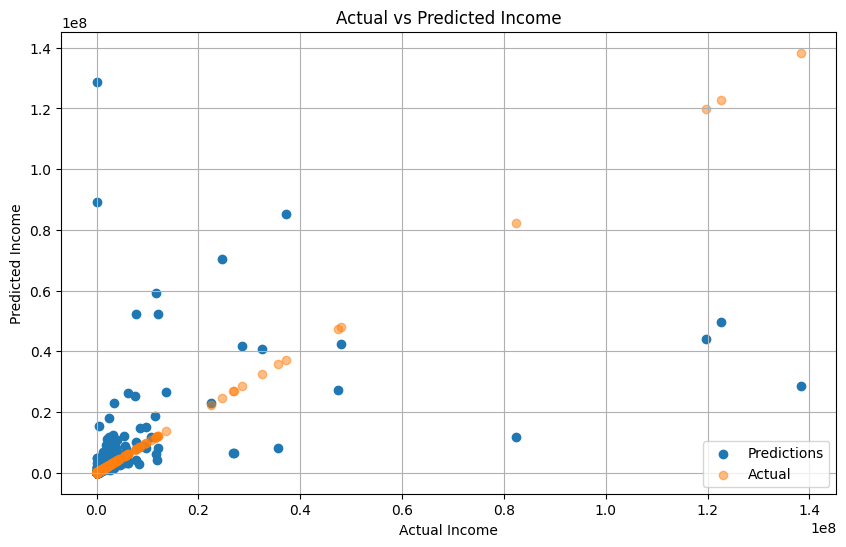

In [ ]:
# prompt: Using dataframe income_variables: make a neural network that predicts income with WAGEINC, AGE, EDUC, and NETWORTH. and the make a scatter plot that plots the predictions vs the test data being used. for example: use this for plotting:
# #plots predictions--remember, our model has never seen X_test
# plt.scatter(X_test.detach().numpy(),y_preds.detach().numpy())
# #plots test data
# plt.scatter(X_test.detach().numpy(),y_test.detach().numpy())

import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare data for the model
X = income_variables[['WAGEINC', 'AGE', 'EDUC', 'NETWORTH']].values
y = income_variables['INCOME'].values

# Convert to PyTorch tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float().reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
class IncomeModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=4, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        x = torch.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

# Instantiate the model
model = IncomeModel()

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 200
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Calculate loss
    loss = loss_fn(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Make predictions on the test data
model.eval()
with torch.no_grad():
    y_preds = model(X_test)

# Plot predictions vs test data
plt.figure(figsize=(10, 6))
# Plots predictions
plt.scatter(y_test.detach().numpy(), y_preds.detach().numpy(), label='Predictions')
# Plots test data (against itself to show ideal scenario if predictions were perfect)
plt.scatter(y_test.detach().numpy(), y_test.detach().numpy(), label='Actual', alpha=0.5)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income")
plt.legend()
plt.grid(True)
plt.show()

# **Tensors:**

Converting all my columns into tensors for matrix multiplication.

In [ ]:
# Convert columns to tensors (float for inputs, long or float for output)
WAGEINC = torch.tensor(income_variables["WAGEINC"].to_numpy(), dtype=torch.float32)
AGE = torch.tensor(income_variables["AGE"].to_numpy(), dtype=torch.float32)
EDUC = torch.tensor(income_variables["EDUC"].to_numpy(), dtype=torch.float32)  # if categorical, you may want to one-hot encode separately
NETWORTH = torch.tensor(income_variables["NETWORTH"].to_numpy(), dtype=torch.float32)

# Create target: income > 50k as 0 or 1
INCOME = torch.tensor((income_variables["INCOME"].to_numpy() > 50000).astype(int), dtype=torch.float32) #This project will have to be binary classification due to this

# Combine inputs into one tensor matrix: shape (num_samples, 4)
X = torch.cat((
    WAGEINC.unsqueeze(1),
    AGE.unsqueeze(1),
    EDUC.unsqueeze(1),
    NETWORTH.unsqueeze(1)
), dim=1)

# Output tensor Y is just the target
Y = INCOME.unsqueeze(1)  # shape (num_samples, 1)

print(X.shape)  # e.g. torch.Size([num_samples, 4])
print(Y.shape)  # e.g. torch.Size([num_samples, 1])


torch.Size([5000, 4])
torch.Size([5000, 1])


In [ ]:
# Scale inputs using StandardScaler (convert tensor to numpy, scale, back to numpy)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())

# Split into train and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y.numpy(), test_size=0.2, random_state=42
)

# Convert back to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

torch.Size([4000, 4]) torch.Size([4000, 1])
torch.Size([1000, 4]) torch.Size([1000, 1])


# **Building the first model:**

Okay so since my project is using binary classification, the notes for graphing a nueral network will be different. However, all the other processes from building, training, and evalutation should be the same. Once we get to graphing the model, I'll try my best to explain the graphs and how each are varied.

In [ ]:
import torch.nn as nn

model_i = nn.Sequential(
    nn.Linear(in_features=4, out_features=32),  # 4 inputs -> 32 neurons
    nn.RReLU(),

    nn.Linear(in_features=32, out_features=16),
    nn.RReLU(),

    nn.Linear(in_features=16, out_features=8),
    nn.RReLU(),

    nn.Linear(in_features=8, out_features=4),
    nn.RReLU(),

    nn.Linear(in_features=4, out_features=1),  # Single output neuron for binary classification
)

Next, we set up the loss function and optimizer:

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_i.parameters(),
                            lr=0.01) # Learning rate: this is how fast it optimizes; smaller is slower, but more consistent

In [ ]:
# Set the number of epochs; this is how many times we update our model
epochs = 2000

for epoch in range(epochs):
    ### Training

    # Update matrices
    model_i.train()

    # 1. Forward pass; makes predictions
    outputs = model_i(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(outputs, Y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_i.eval() # Forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_i(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happening
    if epoch % 200 == 0: # Prints every 200 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.68272, Test loss: 0.68131
Epoch: 200 | Train loss: 0.63447, Test loss: 0.63142
Epoch: 400 | Train loss: 0.61933, Test loss: 0.61538
Epoch: 600 | Train loss: 0.61447, Test loss: 0.61004
Epoch: 800 | Train loss: 0.61279, Test loss: 0.60802
Epoch: 1000 | Train loss: 0.61192, Test loss: 0.60699
Epoch: 1200 | Train loss: 0.61134, Test loss: 0.60627
Epoch: 1400 | Train loss: 0.61071, Test loss: 0.60559
Epoch: 1600 | Train loss: 0.61004, Test loss: 0.60485
Epoch: 1800 | Train loss: 0.60926, Test loss: 0.60395


In [ ]:
model_i.eval()
with torch.inference_mode():
    outputs = model_i(X_test)                   # raw logits (e.g., shape [N, 1])
    Y_preds = torch.sigmoid(outputs).squeeze()  # probabilities (shape [N])

Okay, to explain this project a little bit deeper: the binary classification, where the output can either be 0 or 1 (0 being income under 50k and 1 being income over 50k), the graphs shown in the notes wouldn't really fit with this type of project. So for this, I did some research. Simply, one of the graphs I can produce is show the predicted probability vs actual on a graph.

Predicted probability refers to the likelihood of an event occurring as estimated by a model, while actual probability represents the true or observed likelihood of the event. In essence, predicted probability is a model's guess based on available data, and actual probability is the real outcome. It's similar to the actual vs predicted plots we've been working with all year.

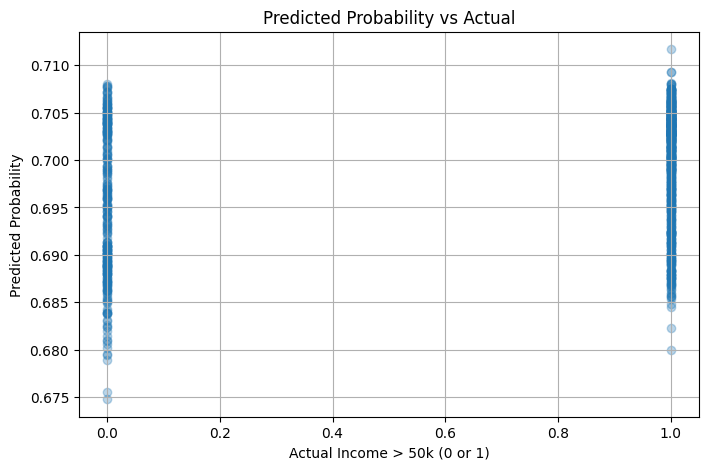

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(Y_test.detach().numpy(), Y_preds.detach().numpy(), alpha=0.3)
plt.xlabel("Actual Income > 50k (0 or 1)")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probability vs Actual")
plt.grid(True)
plt.show()

Another way to showcase binary classification is a graph called the ROC curve.

From Google: "An ROC (Receiver Operating Characteristic) curve visually represents the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) of a classification model at different threshold settings. It helps evaluate the performance of a binary classifier."


---


**Essentially here's how what will be shown/modeled:**

It shows the trade-off between:

True Positive Rate (TPR) – how many actual positives were correctly identified (also called sensitivity or recall), and

False Positive Rate (FPR) – how many actual negatives were incorrectly labeled as positives.

The curve plots TPR vs. FPR at different threshold values.

**Key Points:**

The dotted diagonal line represents random guessing.

The closer the curve is to the top-left corner, the better the model is.

The Area Under the Curve (AUC) tells you how good your model is overall:

1.0 = perfect

0.5 = random guess

< 0.5 = worse than guessing (flipped prediction)

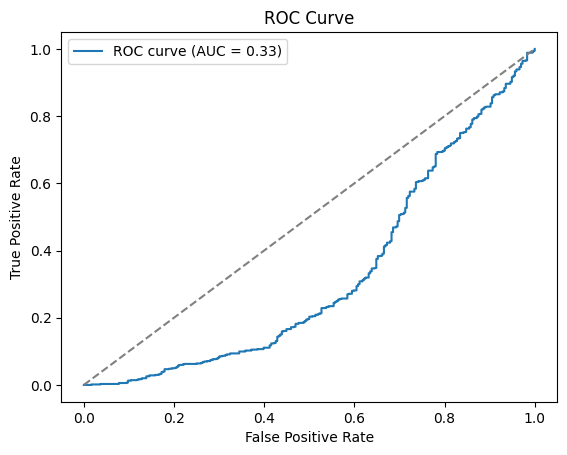

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_preds_flipped = 1 - Y_preds
fpr, tpr, _ = roc_curve(Y_test.detach().numpy(), Y_preds_flipped.detach().numpy())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

With the classification I had written above, any curve BELOW the dotted line is not a good prediction and actually worse than guessing. So with this, maybe a nueral network isn't too good with predicting a binary classification. Let's try a regression model that showcases the same thing, but without the target. So I want to see how Age, Education, and Networth influence the component of income.



---



# **Building a Second Model:**

Within this second model, I just want to see how the multiple variables affect income, so for this, no binary classification is needed.

In [ ]:
# Prepare features and target
features = income_variables[['AGE', 'EDUC', 'NETWORTH']]
target = income_variables['INCOME']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.float32)
Y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)  # shape (N,1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.numpy())
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

In [ ]:
# Define the model
model = nn.Sequential(
    nn.Linear(3, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = loss_fn(y_pred, Y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Every 200 epochs, evaluate on test set
    if epoch % 200 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
            test_loss = loss_fn(test_pred, Y_test)
        print(f"Epoch {epoch}: Train loss = {loss.item():.4f}, Test loss = {test_loss.item():.4f}")

# Final evaluation and plot
model.eval()
with torch.inference_mode():
    y_preds = model(X_test)

Epoch 0: Train loss = 230832262348800.0000, Test loss = 69685622079488.0000
Epoch 200: Train loss = 222372099522560.0000, Test loss = 66875195129856.0000
Epoch 400: Train loss = 130980471898112.0000, Test loss = 57325448593408.0000
Epoch 600: Train loss = 89530061291520.0000, Test loss = 67624679505920.0000
Epoch 800: Train loss = 87737717751808.0000, Test loss = 68784811409408.0000
Epoch 1000: Train loss = 86705063329792.0000, Test loss = 69416037384192.0000
Epoch 1200: Train loss = 85779514654720.0000, Test loss = 69672619737088.0000
Epoch 1400: Train loss = 84918801530880.0000, Test loss = 69812701102080.0000
Epoch 1600: Train loss = 84091282128896.0000, Test loss = 69903763636224.0000
Epoch 1800: Train loss = 83282242830336.0000, Test loss = 69961271738368.0000


# **Visualizations/Graphs:**

With these graphs/visualizations, I didn't really know how to graph the 3 features against income. So, I'm thinking of showing 3 graphs, each with different features on affecting the totality of income. Let's see the results.

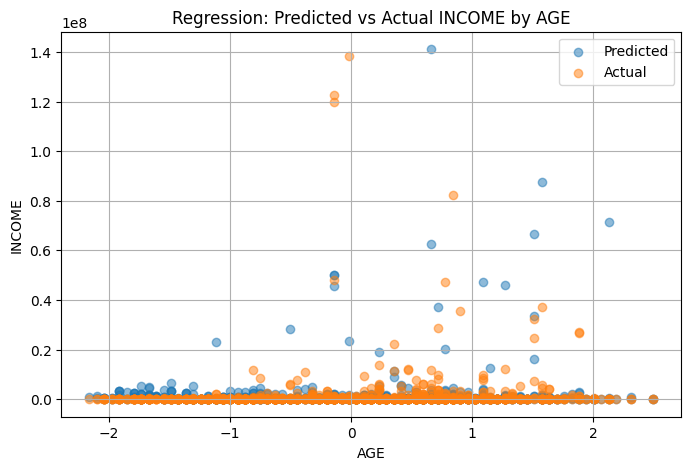

In [ ]:
# Pick a feature index (0 = AGE, 1 = EDUC, 2 = NETWORTH)
feature_index = 0
X_test_feature = X_test[:, feature_index]

# Labels for each feature
feature_names = {0: "AGE", 1: "EDUC", 2: "NETWORTH"}
x_label = feature_names[feature_index]
title = f"Regression: Predicted vs Actual INCOME by {x_label}"

# Plot predicted vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test_feature.detach().numpy(), y_preds.squeeze().detach().numpy(), label="Predicted", alpha=0.5)
plt.scatter(X_test_feature.detach().numpy(), Y_test.detach().numpy(), label="Actual", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel("INCOME")
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()

For this graph, Actual Income by Age vs Predicted, most of the actual values cluster near the bottom of the graph. However, some of the predicted values are spread evenly compared to the actual values. With this, Age doesn't really predict income super strongly, as the predictions vary and somewhat align. However, it's decent. Most of the actual points that are near the 1.2 line, are close to being predicted by the points made by the predicted. It isn't perfect, but the form of being a predictor is there.

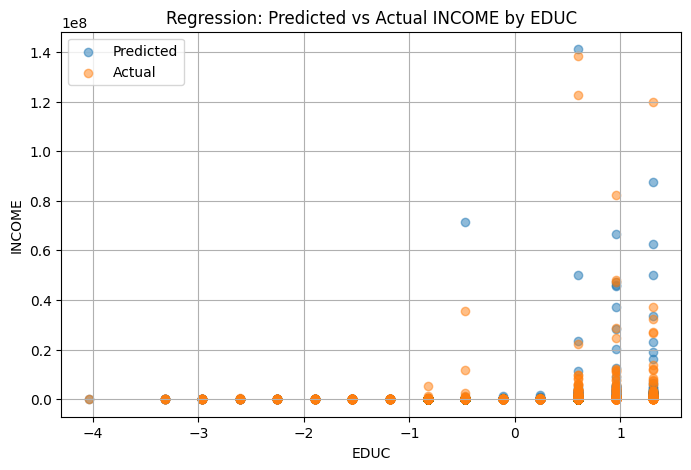

In [ ]:
# Pick a feature index (0 = AGE, 1 = EDUC, 2 = NETWORTH)
feature_index = 1
X_test_feature = X_test[:, feature_index]

# Labels for each feature
feature_names = {0: "AGE", 1: "EDUC", 2: "NETWORTH"}
x_label = feature_names[feature_index]
title = f"Regression: Predicted vs Actual INCOME by {x_label}"

# Plot predicted vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test_feature.detach().numpy(), y_preds.squeeze().detach().numpy(), label="Predicted", alpha=0.5)
plt.scatter(X_test_feature.detach().numpy(), Y_test.detach().numpy(), label="Actual", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel("INCOME")
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()

Predicting income by Education shows similar correlation to the graph above (the predicting income by age graph). As the education of the person increases, the income increases. Which for the predicted points, it correlates this amazingly well. Education, as I thought, is an amazing predictor for income.

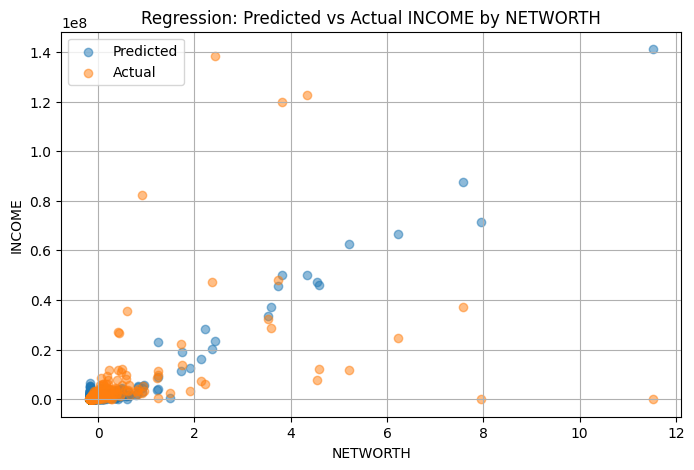

In [ ]:
# Pick a feature index (0 = AGE, 1 = EDUC, 2 = NETWORTH)
feature_index = 2
X_test_feature = X_test[:, feature_index]

# Labels for each feature
feature_names = {0: "AGE", 1: "EDUCATION", 2: "NETWORTH"}
x_label = feature_names[feature_index]
title = f"Regression: Predicted vs Actual INCOME by {x_label}"

# Plot predicted vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test_feature.detach().numpy(), y_preds.squeeze().detach().numpy(), label="Predicted", alpha=0.5)
plt.scatter(X_test_feature.detach().numpy(), Y_test.detach().numpy(), label="Actual", alpha=0.5)
plt.xlabel(x_label)
plt.ylabel("INCOME")
plt.title(title)
plt.legend()
plt.grid(True)
plt.show()

Before choosing networth as a predictor, I thought of networth as a component where if networth are somewhat related to salary similarly to income. However from Google: "Net worth and income are related, but not a perfect predictor of each other. Higher earners tend to have higher net worth, but there are many exceptions. A person can have a high net worth without a high income (e.g., owning valuable assets, inheritance) or a low net worth despite a high income (e.g., high debt, spending habits). "

So with this, I understand how the predicted points are not correlated the actual points at all. Networth is not a great predictor for income.